# Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

## Loading the dataset


In [2]:

df = pd.read_excel(r"C:\Users\nuzha\Downloads\review_processed_data.xlsx")
df = df[df['anomaly'] == False]

## Categorizng App

C:\Users\nuzha\AppData\Local\Temp\ipykernel_9460\1280673906.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_type_counts.index, y=app_type_counts.values, palette='viridis')


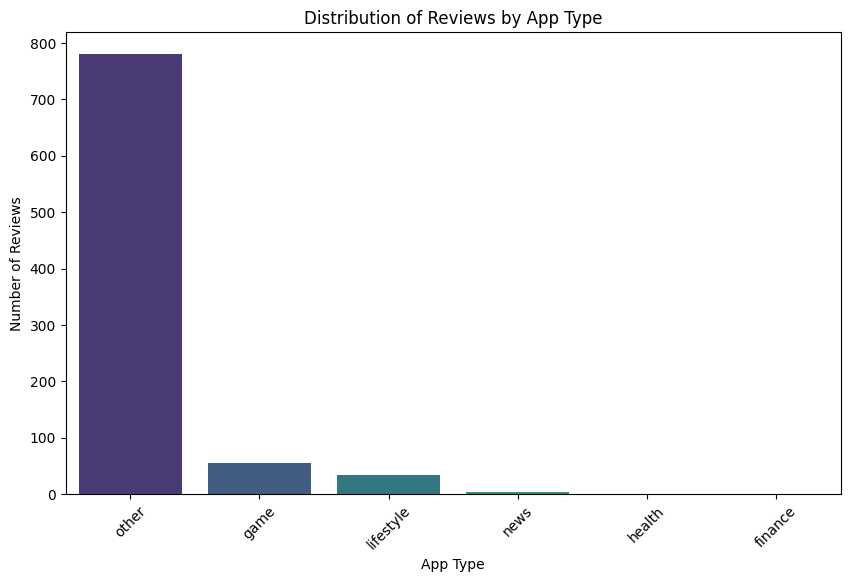

In [12]:


app_categories = {
    'health': ['fitness', 'workout', 'healthy', 'meditation', 'diet'],
    'lifestyle': ['recipes', 'meal', 'shopping', 'social'],
    'game': ['game', 'fun', 'addictive'],
    'finance': ['financial', 'advice', 'tools'],
    'news': ['news', 'headlines', 'updated'],
    'education': ['educational', 'learning', 'languages']
}

def categorize_app_type(text):
    for category, words in app_categories.items():
        if any(word in text.lower() for word in words):
            return category
    return 'other' 

df['app_type'] = df['clean_review'].apply(categorize_app_type)


app_type_counts = df['app_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=app_type_counts.index, y=app_type_counts.values, palette='viridis')
plt.title('Distribution of Reviews by App Type')
plt.xlabel('App Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


### Sentiment analysis

In [13]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_review'].apply(get_sentiment)
df.head()

,review_description,rating,review_date,clean_review,word_count_clean,predicted_rating,rating_difference,anomaly,app_type,sentiment
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07,app good connect friend family potential busin...,40,2.867123,0.132877,False,other,positive
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09,use favorite social medium app improvement har...,47,1.665118,0.334882,False,lifestyle,negative
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57,I love app .. late I problem screen background...,36,1.940489,0.059511,False,other,positive
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04,use great app bug issue . plus ruin user inter...,46,3.034115,0.034115,False,lifestyle,positive
5,The app has been glitching alot. Videos will n...,1,2023-07-11 05:04:31,app glitche alot . video play instead black sc...,36,1.409453,0.409453,False,other,negative


C:\Users\nuzha\AppData\Local\Temp\ipykernel_9460\365246064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


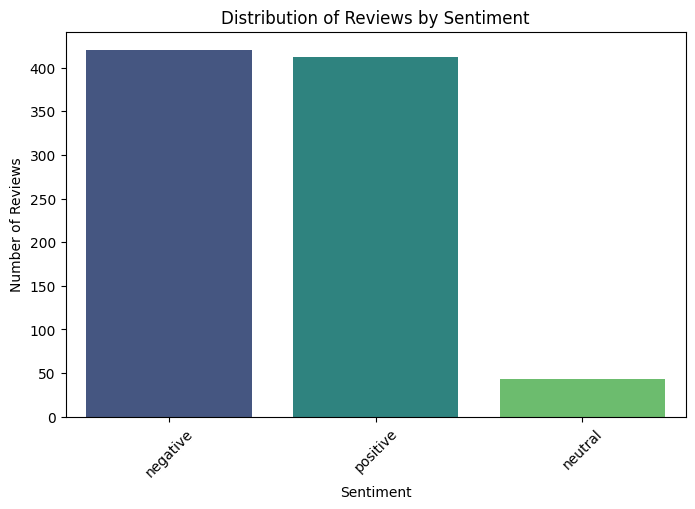

In [14]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

### Creating wordcloud of negative review

C:\Users\nuzha\AppData\Local\Temp\ipykernel_9460\970153552.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_data['top_keywords'] = get_top_keywords(tfidf_matrix, feature_names, top_n=10)
C:\Users\nuzha\AppData\Local\Temp\ipykernel_9460\970153552.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_data['top_keywords'] = get_top_keywords(tfidf_matrix, feature_names, top_n=10)


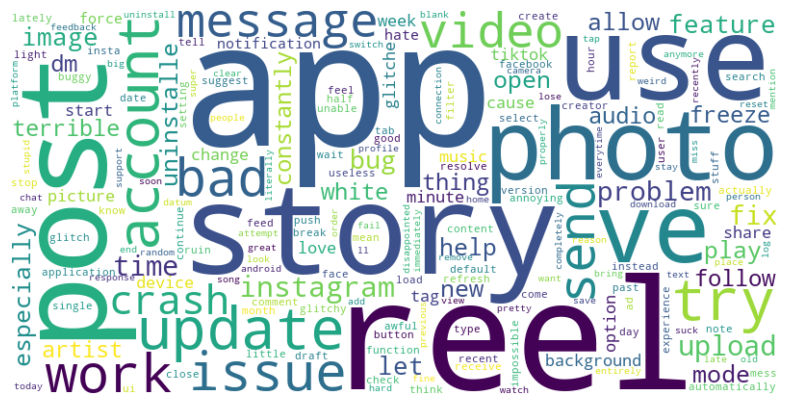

In [15]:
neg_data = df[df['sentiment'] == 'negative']
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(neg_data['clean_review'])

feature_names = tfidf_vectorizer.get_feature_names_out()

def get_top_keywords(tfidf_matrix, feature_names, top_n=10):
    top_keywords = []
    for row in tfidf_matrix:
        row_data = row.toarray()[0]
        top_indices = row_data.argsort()[-top_n:][::-1]
        top_keywords.append([feature_names[i] for i in top_indices])
    return top_keywords

neg_data['top_keywords'] = get_top_keywords(tfidf_matrix, feature_names, top_n=10)

neg_data['top_keywords'] = get_top_keywords(tfidf_matrix, feature_names, top_n=10)

all_keywords = ' '.join([' '.join(keywords) for keywords in neg_data['top_keywords']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Categorizing Negative Reviews

In [16]:
keywords = {
    'crash': ['crash', 'crashes', 'crashing'],
    'bug': ['bug', 'glitch', 'issue', 'error'],
    'update': ['update', 'updated', 'updating'],
    'feature': ['feature', 'option', 'functionality'],
    'performance': ['slow', 'lag', 'freeze', 'performance'],
    'design': ['design', 'interface', 'layout', 'UI'],
    'ads': ['ads', 'advertisement', 'promotion']
}

def categorize_review(text):
    for category, words in keywords.items():
        if any(word in text.lower() for word in words):
            return category
    return 'other' 

neg_data['category'] = neg_data['review_description'].apply(categorize_review)

neg_data.head()

C:\Users\nuzha\AppData\Local\Temp\ipykernel_9460\1721500233.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_data['category'] = neg_data['review_description'].apply(categorize_review)


,review_description,rating,review_date,clean_review,word_count_clean,predicted_rating,rating_difference,anomaly,app_type,sentiment,top_keywords,category
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09,use favorite social medium app improvement har...,47,1.665118,0.334882,False,lifestyle,negative,"[hard, white, use, drive, background, read, so...",feature
5,The app has been glitching alot. Videos will n...,1,2023-07-11 05:04:31,app glitche alot . video play instead black sc...,36,1.409453,0.409453,False,other,negative,"[play, ve, alot, work, stay, instead, default,...",bug
6,"I like this app a lot, but the messaging part ...",3,2023-07-18 12:48:16,I like app lot message app frustrating . I not...,43,2.583792,0.416208,False,other,negative,"[send, respond, message, friend, reel, ill, en...",bug
9,This app has so many frustrating aspects. The ...,2,2023-07-13 07:46:30,app frustrating aspect . theme work work 5 min...,49,1.565003,0.434997,False,other,negative,"[message, stop, work, send, app, hardly, entir...",bug
11,"So a while ago, I noticed that when I talk to ...",3,2023-07-12 05:02:12,ago I notice I talk people background getting ...,42,2.499633,0.500367,False,other,negative,"[default, background, people, change, normal, ...",other


C:\Users\nuzha\AppData\Local\Temp\ipykernel_9460\78444331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


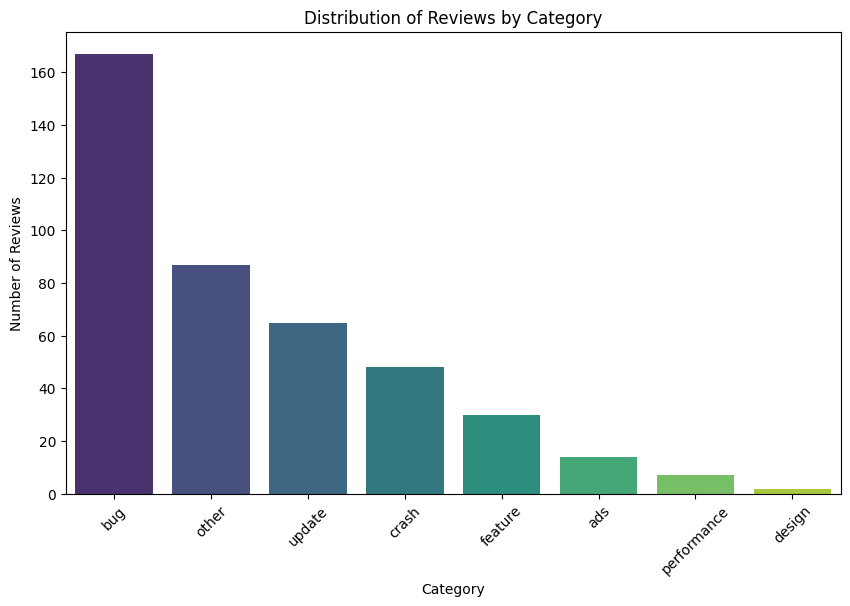

In [17]:
category_counts = neg_data['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()